# Objetivo 5: Lograr la igualdad entre los géneros y empoderar a todas las mujeres y las niñas
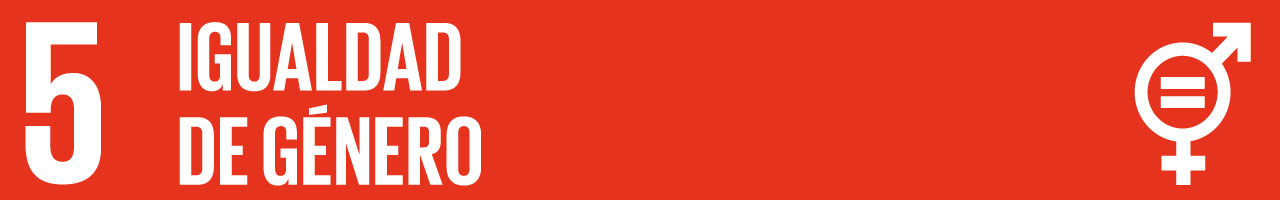

#### Este objetivo busca promover la igualdad de género, logrando que las mujeres y niñas disfruten de una plena igualdad, derrocando cualquier impedimento de su empoderamiento.

#### 35% de las mujeres entre 15 y 29 años son victimas de violencia.
#### 1 de cada 3 niñas sufre algún tipo de mutilación genital en los países de África y Oriente Medio.
#### Las mujeres, en promedio ganan 23% menos que los hombres.

#### La igualdad de género es un derecho humano fundamental, independientemente del país de residencia. Avanzar en la igualdad de género es fundamental para crear una sociedad sana en todos sus ámbitos, desde la reducción de la pobreza hasta la promoción de la salud, la educación, la protección y el bienestar de niñas y niños.


#### Por eso, vamos a scrapear los datos de la F1 Academy (temporada 2025), para demostrar como en el automovilismo se estan ofreciendo plataformas para inspirar y apoyar a niñas y mujeres jóvenes a emprender sus propios caminos.

In [18]:
# Importamos las biliotecas
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd

In [19]:
# Función corregida para mapear todas las columnas esenciales
def limpiar_datos_f1_final(html_table):
    """
    Procesa el HTML de la tabla de F1 Academy para extraer Piloto 
    Puntos Totales y Puntos de CADA CARRERA
    """
    # Analizamos el HTML con BeautifulSoup
    soup = BeautifulSoup(html_table, 'html.parser')
    datos_clasificacion = []

    # Buscamos la tabla principal
    tabla = soup.find('table', class_='table')
    if not tabla:
        return pd.DataFrame() 

    # Iteramos sobre cada fila de la tabla
    for tr in tabla.find('tbody').find_all('tr'):
        celdas = tr.find_all('td')
        if not celdas:
            continue
            
        datos_fila = {}
        
        # Extaemos los datos de cada celda relevante
        celda_piloto = celdas[0]
        
        # 1 --> Extracción del Nombre del Piloto
        nombre_piloto_tag = celda_piloto.find('span', class_='driver-name')
        
        if nombre_piloto_tag:
            nombre_legible = nombre_piloto_tag.find('span', class_='visible-desktop-up')            
            if nombre_legible:
                datos_fila['PILOTO'] = nombre_legible.text.strip()
            else:
                datos_fila['PILOTO'] = nombre_piloto_tag.get_text(strip=True)
        else:
            datos_fila['PILOTO'] = 'N/A'
        
        # 2 --> Extracción de Puntos Totales
        try:
             total_puntos_str = celdas[1].text.strip()
             datos_fila['PUNTOS_TOTALES'] = pd.to_numeric(total_puntos_str, errors='coerce')
        except:
             datos_fila['PUNTOS_TOTALES'] = 0
            
        # 3 --> Extracción de Puntos por Carrera
        puntos_idx = 0
        for celda_evento in celdas[2:]: 
            # Separamos CADA etiqueta 'score' para los puntos individuales
            puntos_carreras_evento = celda_evento.find_all('div', class_='score')
            for score_div in puntos_carreras_evento:
                puntos = score_div.text.strip()
                col_nombre = f'Carrera_{puntos_idx + 1}'
                # Usamos una conversión a 0 si el punto es '-'
                valor_numerico = pd.to_numeric(puntos, errors='coerce')
                datos_fila[col_nombre] = valor_numerico if pd.notna(valor_numerico) else 0 
                puntos_idx += 1
                
        datos_clasificacion.append(datos_fila)
        
    df = pd.DataFrame(datos_clasificacion)
    
    # Aseguramos que las columnas clave existen y el orden.
    columnas_finales = ['PILOTO', 'PUNTOS_TOTALES'] 
    carreras_cols = [col for col in df.columns if col.startswith('Carrera_')]
    
    return df[columnas_finales + carreras_cols]

In [20]:
# Url de la pagina web
url = "https://www.f1academy.com/Racing-Series/Standings/Driver?seasonId=3"

In [21]:
# Inicializar WebDriver (usando la experiencia previa con Chrome)
driver = webdriver.Chrome() 
driver.get(url)
print(f"Abriendo la URL de F1 Academy: {url}")

# Esperar a que la tabla se cargue
wait = WebDriverWait(driver, 20)
wait.until(EC.presence_of_element_located((By.CLASS_NAME, "table"))) 

# Extraemos el HTML de la tabla
tabla_elemento = driver.find_element(By.CLASS_NAME, "table")
html_table = tabla_elemento.get_attribute('outerHTML')
    
# Usamos la función optimizada
df_clasificacion = limpiar_datos_f1_final(html_table)
    
# Cerrar el navegador
print("\n✅ Extracción de la clasificación de F1 Academy completada.")
driver.quit()

Abriendo la URL de F1 Academy: https://www.f1academy.com/Racing-Series/Standings/Driver?seasonId=3

✅ Extracción de la clasificación de F1 Academy completada.


#### Exploracion de los datos

In [22]:
# Mostramos las primeras filas
df_clasificacion.head()

,PILOTO,PUNTOS_TOTALES,Carrera_1,Carrera_2,Carrera_3,Carrera_4,Carrera_5,Carrera_6,Carrera_7,Carrera_8,Carrera_9,Carrera_10,Carrera_11,Carrera_12,Carrera_13,Carrera_14,Carrera_15
0,D. Pin,151,5,26,6,15,11,0,25,5,16,3,15,5,19,0,0
1,M. Weug,142,6,20,8,25,5,0,0,0,8,7,28,8,27,0,0
2,E. Lloyd,101,3,6,10,4,0,0,18,8,18,5,12,2,15,0,0
3,C. Chambers,99,9,15,2,21,6,2,7,0,27,4,0,6,0,0,0
4,A. Palmowski,73,10,8,6,12,8,0,0,3,6,2,18,0,0,0,0


In [23]:
# Vemos la informacion
df_clasificacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   PILOTO          24 non-null     object
 1   PUNTOS_TOTALES  24 non-null     int64 
 2   Carrera_1       24 non-null     int64 
 3   Carrera_2       24 non-null     int64 
 4   Carrera_3       24 non-null     int64 
 5   Carrera_4       24 non-null     int64 
 6   Carrera_5       24 non-null     int64 
 7   Carrera_6       24 non-null     int64 
 8   Carrera_7       24 non-null     int64 
 9   Carrera_8       24 non-null     int64 
 10  Carrera_9       24 non-null     int64 
 11  Carrera_10      24 non-null     int64 
 12  Carrera_11      24 non-null     int64 
 13  Carrera_12      24 non-null     int64 
 14  Carrera_13      24 non-null     int64 
 15  Carrera_14      24 non-null     int64 
 16  Carrera_15      24 non-null     int64 
dtypes: int64(16), object(1)
memory usage: 3.3+ KB


#### Limpieza de los datos

In [24]:
# Eliminamos la carrera 14 y 15 (todavia no se corrieron)
df_clasificacion = df_clasificacion.drop(columns=['Carrera_14', 'Carrera_15'], errors='ignore')

#### Transformacion de los datos

In [25]:
# Mapeamos los equipos de cada piloto
map_equipos = {
    "D. Pin" : "Prema Racing",
    "M. Weug": "MP Motorsport",
    "E. Lloyd": "Rodin Motorsport",
    "C. Chambers" : "Campos Racing",
    "A. Palmowski" : "Campos Racing",
    "N. Gademan" : "Prema Racing",
    "A. Larsen": "MP Motorsport",
    "T. Hausmann": "Prema Racing",
    "E. Felbermayr": "Rodin Motorsport",
    "L. Block": "ART Grand Prix",
    "C. Chong": "Rodin Motorsport",
    "R. Ferreira": "Campos Racing",
    "A. Nobels": "ART Grand Prix",
    "J. Ciconte" : "MP Motorsport",
    "E. Kosterman (WCD)": "Hitech TGR",
    "A. Anagnostiadis" : "Hitech TGR",
    "C. Crone": "ART Grand Prix",
    "N. Havrda" : "Hitech TGR",
    "M. Paatz (WCD)" : "Hitech TGR",
    "M. Bruce" : "Hitech TGR",
    "A. Dobson (WCD)" : "Hitech TGR",
    "W. Shi (WCD)" : "Hitech TGR",
    "F. AlYousef (WCD)" : "Hitech TGR",
    "L. Billard (WCD)" : "Hitech TGR"
}

# Mapeamos los equipos
df_clasificacion['EQUIPO'] = df_clasificacion['PILOTO'].map(map_equipos)

In [26]:
# Cambiamos los nombres de las columnas
df_clasificacion = df_clasificacion.rename(columns={
    'Carrera_1': 'China_R1',
    'Carrera_2': 'China_R2',
    'Carrera_3': 'Arabia_R1',
    'Carrera_4': 'Arabia_R2',
    'Carrera_5': 'Miami_R1',
    'Carrera_6': 'Miami_R2',
    'Carrera_7': 'Canada_R1',
    'Carrera_8': 'Canada_R2',
    'Carrera_9': 'Canada_R3',
    'Carrera_10': 'PaisesBajos_R1',
    'Carrera_11': 'PaisesBajos_R2',
    'Carrera_12': 'Singapur_R1',
    'Carrera_13': 'Singapur_R2'
})

In [27]:
# Reordenamos las columnas
columnas_ordenadas = ['PILOTO', 'EQUIPO', 'PUNTOS_TOTALES',
                       'China_R1', 'China_R2',
                       'Arabia_R1', 'Arabia_R2',
                       'Miami_R1', 'Miami_R2',
                       'Canada_R1', 'Canada_R2', 'Canada_R3',
                       'PaisesBajos_R1', 'PaisesBajos_R2',
                       'Singapur_R1', 'Singapur_R2']
df_clasificacion = df_clasificacion[columnas_ordenadas]

#### Guardamos los datos procesados

In [28]:
# Guardamos los datos en un archivo CSV
nombre_archivo = "archivos/f1_academy.csv"
df_clasificacion.to_csv(nombre_archivo, index=False, encoding='utf-8')

In [29]:
import pandas as pd

# Cargar tus datos
df = pd.read_csv("archivos/f1_academy.csv")  # o el nombre correcto de tu archivo

# Pasar de formato ancho a largo
df_largo = df.melt(
    id_vars=["PILOTO", "EQUIPO", "PUNTOS_TOTALES"],  # columnas que no cambian
    var_name="CARRERA",      # nueva columna con el nombre de cada carrera
    value_name="PUNTOS"      # nueva columna con los puntos correspondientes
)

# Mostrar el resultado
print(df_largo.head())

# (Opcional) Ordenar por piloto y carrera
df_largo = df_largo.sort_values(["PILOTO", "CARRERA"]).reset_index(drop=True)

# Guardar la tabla larga para usarla en Looker
df_largo.to_csv("archivos/f1academy_largo.csv", index=False)
print("✅ Archivo guardado como 'f1academy_largo.csv'")


         PILOTO            EQUIPO  PUNTOS_TOTALES   CARRERA  PUNTOS
0        D. Pin      Prema Racing             151  China_R1       5
1       M. Weug     MP Motorsport             142  China_R1       6
2      E. Lloyd  Rodin Motorsport             101  China_R1       3
3   C. Chambers     Campos Racing              99  China_R1       9
4  A. Palmowski     Campos Racing              73  China_R1      10
✅ Archivo guardado como 'f1academy_largo.csv'
